# CH 9 - Plotting and Visualization

## 9.1 A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#%matplotlib widget
%matplotlib inline
plt.rc('figure', figsize=(10, 6))

#### Basic plot

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

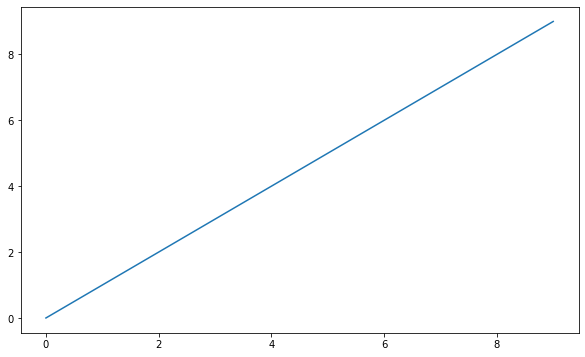

In [3]:
plt.plot(data);

### Figures and Subplots

In [4]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [5]:
# You can’t make a plot with a blank figure. You have to create 
# one or more subplots using add_subplot

ax1 = fig.add_subplot(2, 2, 1)

#### This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (from 1). 

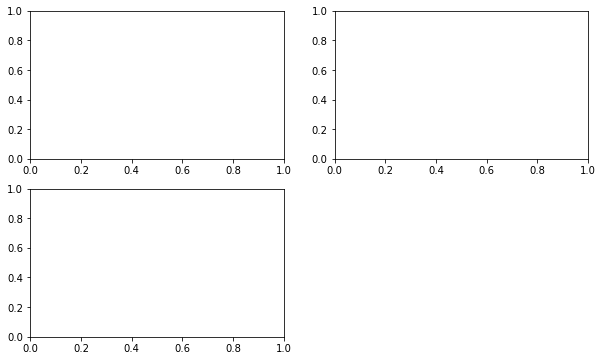

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

fig

#### One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.

#### When you issue a plotting command, matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation

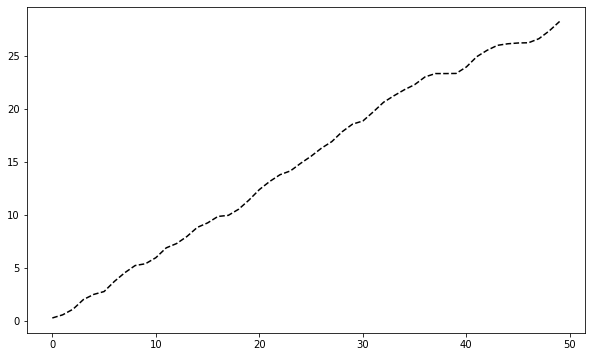

In [7]:
plt.plot(np.random.rand(50).cumsum(), 'k--')

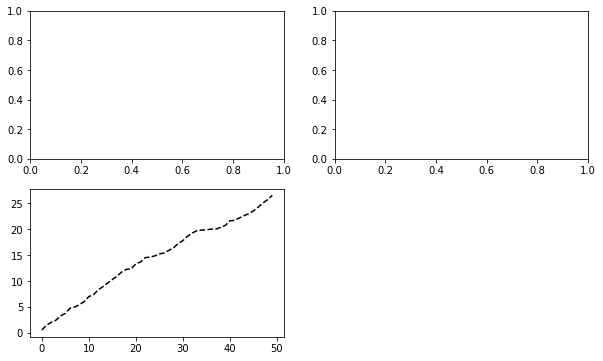

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.rand(50).cumsum(), 'k--')

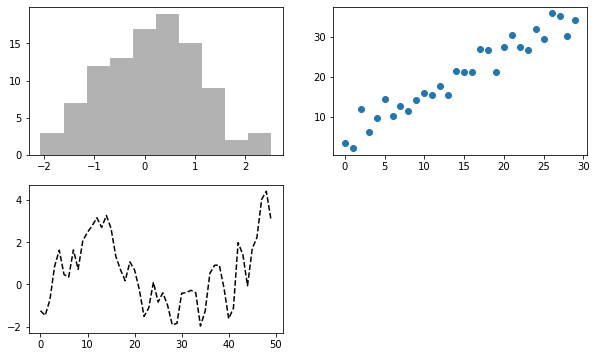

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

_ = ax1.hist(np.random.randn(100), bins=10, color='k', alpha=.3)

ax2.scatter(np.arange(30), np.arange(30)+ 10 * np.random.rand(30))

plt.plot(np.random.randn(50).cumsum(), 'k--')

#### Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cac45a2b0>,
      dtype=object)

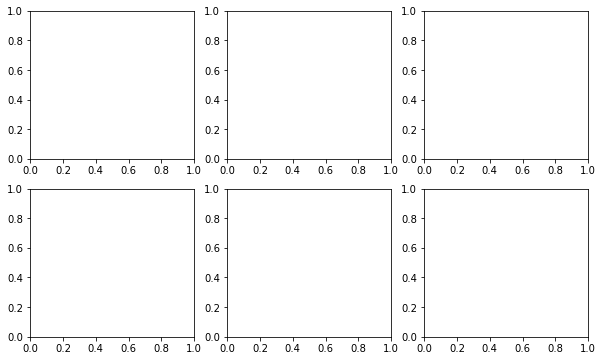

In [10]:
fig, axes = plt.subplots(2,3)

axes

#### This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, axes[0, 1].

* You can also indicate that subplots should have the same x- or y-axis using sharex and sharey, respectively. This is especially useful when you’re comparing data on the same scale; 

* otherwise, matplotlib autoscales plot limits independently

### Adjusting the spacing around subplots

####  You can change the spacing using the subplots_adjust method on Figure objects, also available as a top-level function

* wspace and hspace controls the percent of the figure width and figure height, respectively, to use as spacing between subplots

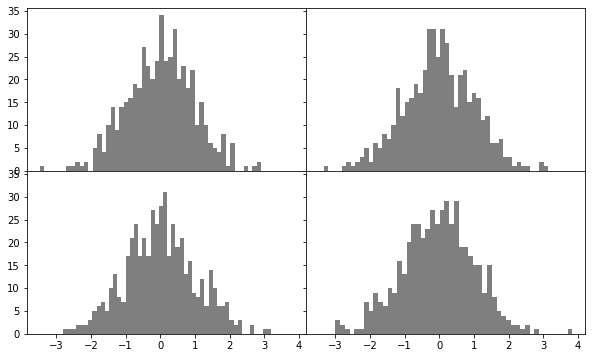

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=.5)

plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

* Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style.
    
    `ax.plot(x, y, 'g--')`
    
*  The same plot could also have been expressed more explicitly as:
    
    `ax.plot(x, y, linestyle='--', color='g')` 
    
* There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE')

* Line plots can additionally have markers to highlight the actual data points. The marker can be part of the style string, which must have color followed by marker type and line style 

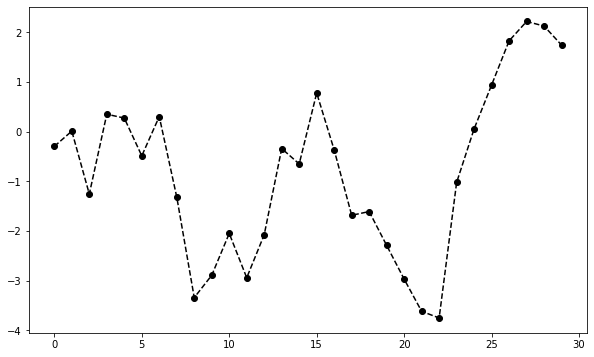

In [12]:
fig = plt.figure()

plt.plot(np.random.randn(30).cumsum(), 'ko--');

* This could also have been written more explicitly as:

    `plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')`
    
#### For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the drawstyle option:


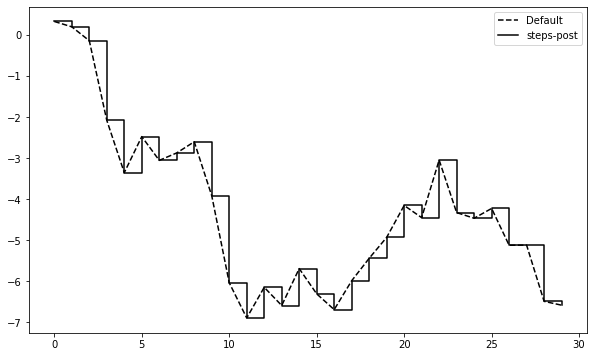

In [13]:
data = np.random.randn(30).cumsum()

plt.figure()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best');

### Ticks, Labels, and Legends

* For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented
native matplotlib API.

* The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

    * Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
    
    * Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

### Setting the title, axis labels, ticks, and ticklabels

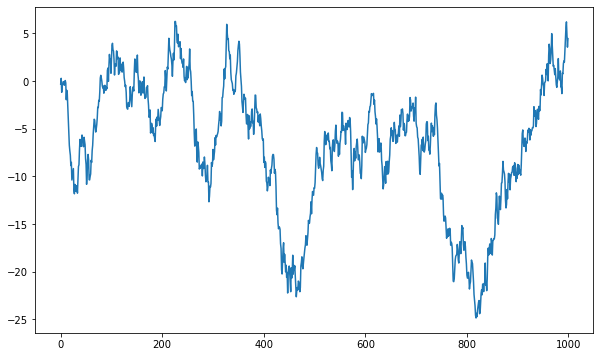

In [14]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

In [15]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('Matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.200000000000003, 'Stages')

#### The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

In [16]:
props = {
    'title': 'My Matplotlib plot',
    'xlabel': 'Stooges'
}

ax.set(**props)

[Text(0.5, 3.200000000000003, 'Stooges'), Text(0.5, 1.0, 'My Matplotlib plot')]

### Adding Legends

*  The easiest is to pass the label argument when adding each piece of the plot

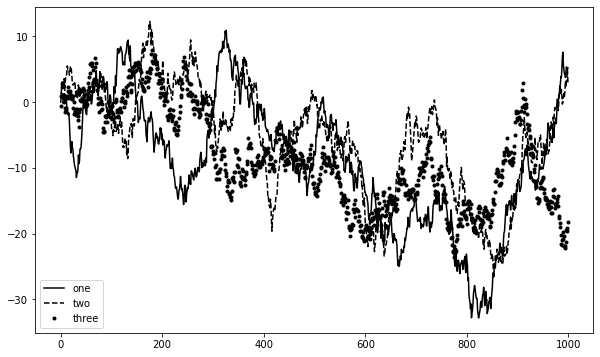

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

# Once you’ve done this, you can either call ax.legend() or 
# plt.legend() to automatically create a legend. 
ax.legend(loc='best')

* To exclude one or more elements from the legend, pass no label or `label='_nolegend_'`.

### Annotations and Drawing on a Subplot

* You can add annotations
and text using the text, arrow, and annotate functions. text draws text at given
coordinates (x, y) on the plot with optional custom styling

In [18]:
x = 100
y = 200
ax.text(x, y, "Hello World!", family='monospace', fontsize=10)

Text(100, 200, 'Hello World!')

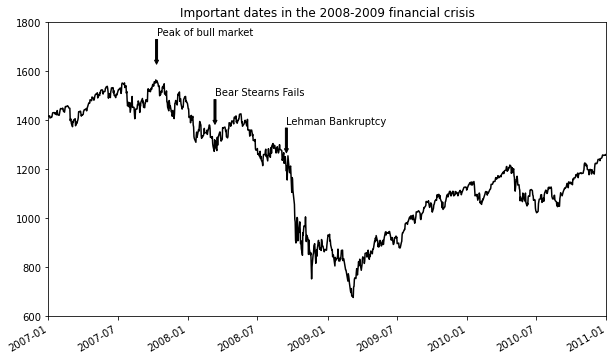

In [19]:
# Example: closing S&P 500 index price since 2007 
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

# important dates and events
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# Create annotations and arrows
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops={'facecolor': 'black', 'headwidth': 4, 
                            'width': 2, 'headlength': 4},
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis');

#### Drawing shapes

* Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches. Some of these, like Rectangle and Circle, are
found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

* To add a shape to a plot, you create the patch object shp and add it to a subplot by
calling `ax.add_patch(shp)`

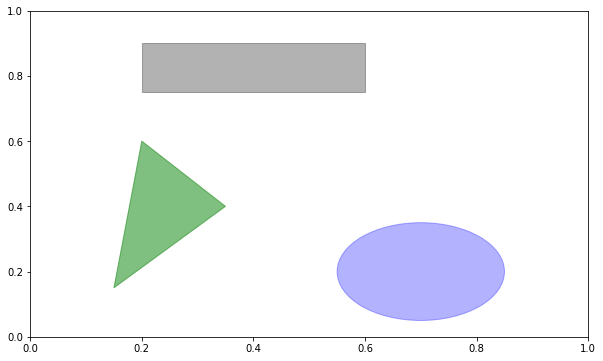

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to a File

* You can save the active figure to file using `plt.savefig`. This method is equivalent to the figure object’s savefig instance method. For example, to save an SVG version of a figure, you need only type:        

    * `plt.savefig('figpath.svg')`        
    
    
* The file type is inferred from the file extension. So if you used .pdf instead, you would get a PDF. There are a couple of important options that I use frequently for publishing graphics: dpi, which controls the dots-per-inch resolution, and bbox_inches, which can trim the whitespace around the actual figure. To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you would do:          

    * `plt.savefig('figpath.png', dpi=400, bbox_inches='tight')`

### matplotlib Configuration

* matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the
configuration programmatically from Python is to use the rc method; for example, to
set the global default figure size to be 10 × 10, you could enter:

    * `plt.rc('figure', figsize=(10, 10))`
    
    
* The first argument to rc is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:             

    * ```font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : 'small'}
    plt.rc('font', **font_options)```

## 9.2 Plotting with pandas and seaborn

### Line Plots

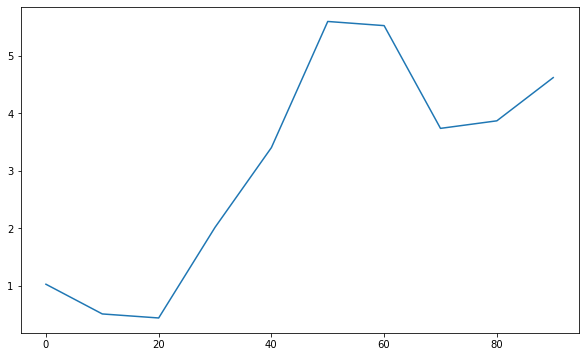

In [21]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

s.plot()

#### The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing use_index=False. 

#### The x-axis ticks and limits can be adjusted with the xticks and xlim options (y-axis respectively). Most of pandas’s plotting methods accept an optional ax parameter, which can be a matplotlib subplot object. 

#### DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically

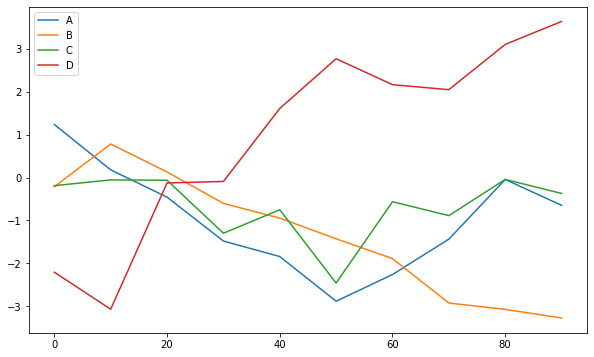

In [22]:
df = pd.DataFrame(np.random.randn(10, 4 ).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot()

#### The plot attribute contains a “family” of methods for different plot types. For example, df.plot() is equivalent to df.plot.line(). We’ll explore some of these methods next.

### Bar Plots

#### The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. 

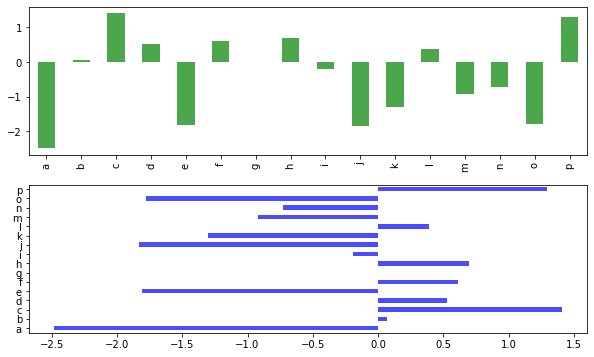

In [23]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='g', alpha=0.7)
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

#### With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. 

In [26]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.307525,0.155132,0.723827,0.247053
two,0.570139,0.159178,0.105196,0.855198
three,0.019728,0.092939,0.996829,0.434254
four,0.149396,0.477560,0.272111,0.282313
five,0.138586,0.152784,0.474887,0.217390
six,0.140622,0.919372,0.088526,0.976045


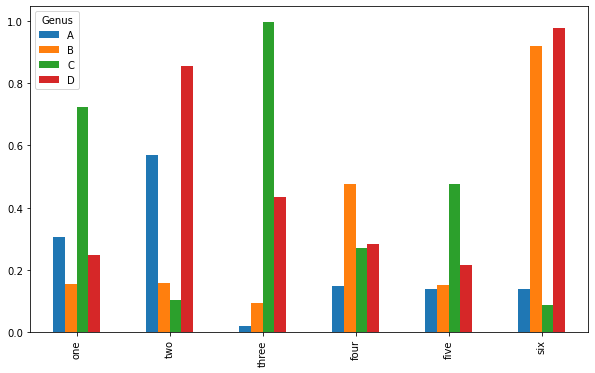

In [27]:
df.plot.bar()

#### We create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together

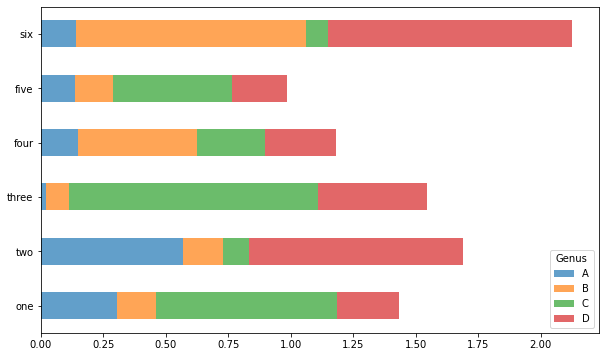

In [29]:
df.plot.barh(stacked=True, alpha=.7)

In [20]:
# Example tipping dataset

tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [21]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to  1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


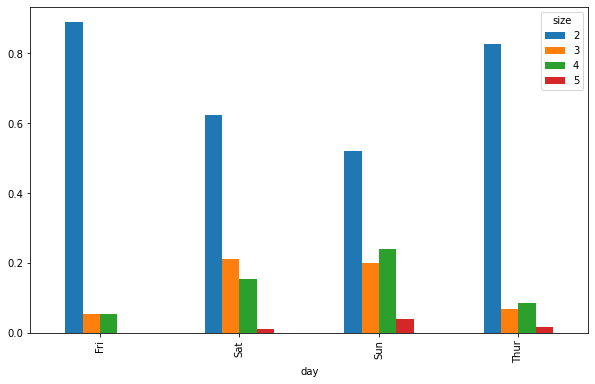

In [34]:
party_pcts.plot.bar()

#### With data that requires aggregation or summarization before making a plot, using the seaborn package can make things much simpler. 

In [22]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


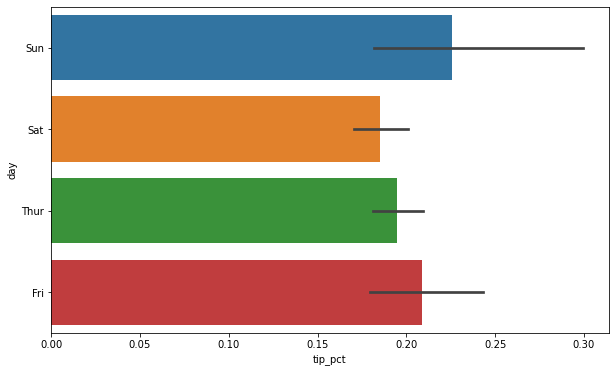

In [36]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

#### seaborn.barplot has a hue option that enables us to split by an additional categorical value 

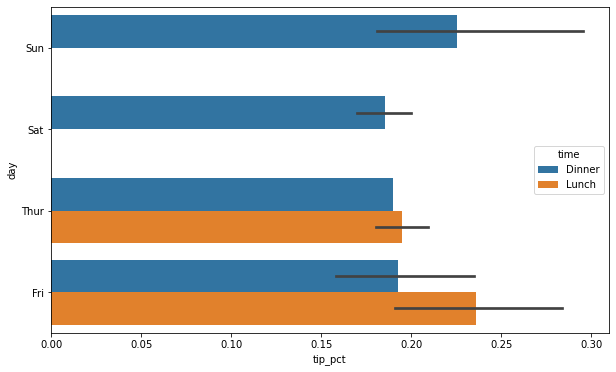

In [37]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### You can switch between different plot appearances using seaborn.set:

In [12]:
sns.set(style='whitegrid')

### Histograms and Density Plots

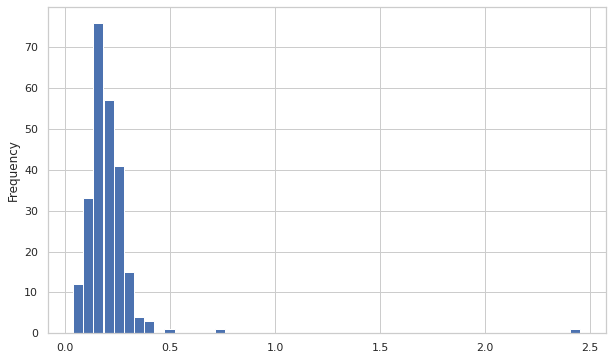

In [39]:
tips['tip_pct'].plot.hist(bins=50)

#### A related plot type is a **density plot**, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. 

* The usual procedure is to approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using `plot.kde` makes a density plot using the conventional mixture-of-normals estimate

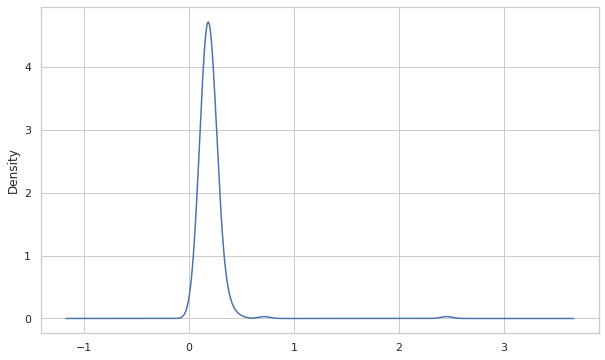

In [40]:
tips['tip_pct'].plot.density()

#### Seaborn makes histograms and density plots even easier through its distplot method, which can plot both a histogram and a continuous density estimate simultaneously. 

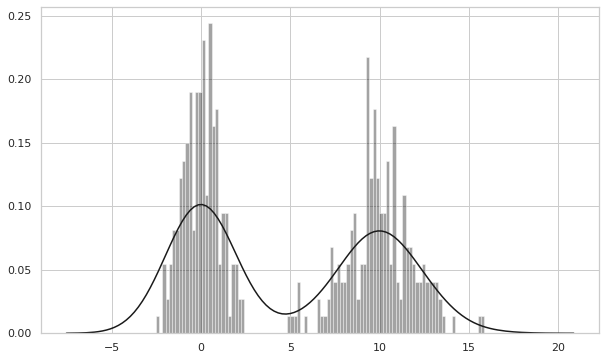

In [43]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [3]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


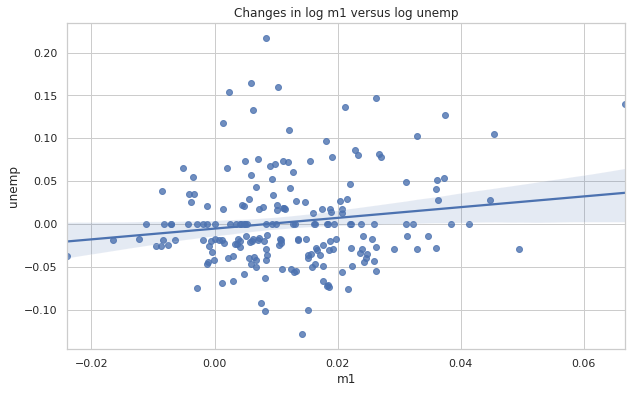

In [17]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log {0} versus log {1}'.format('m1', 'unemp'));

#### Pairplot

* In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so seaborn has a convenient pairplot function,
which supports placing histograms or density estimates of each variable along the
diagonal 

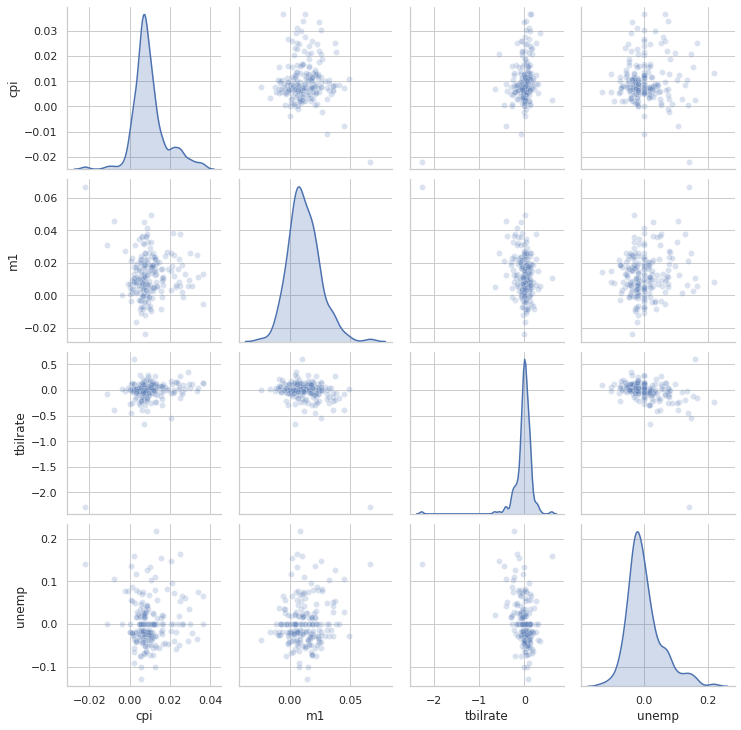

In [19]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': .2});

### Facet Grids and Categorical Data

> UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

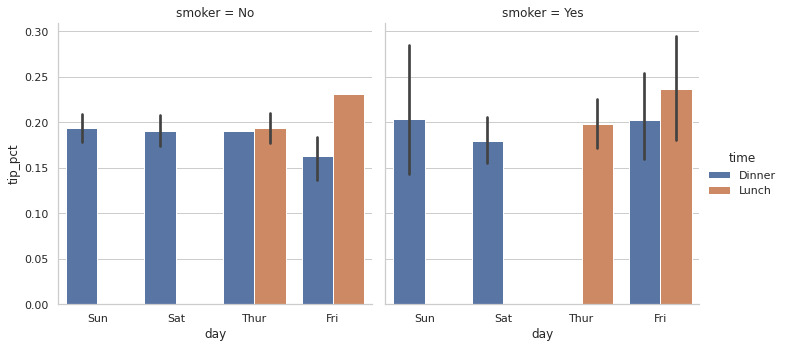

In [24]:
sns.catplot(x='day', y='tip_pct', data=tips[tips['tip_pct'] < 1],
               hue='time', col='smoker', kind='bar')

#### Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value

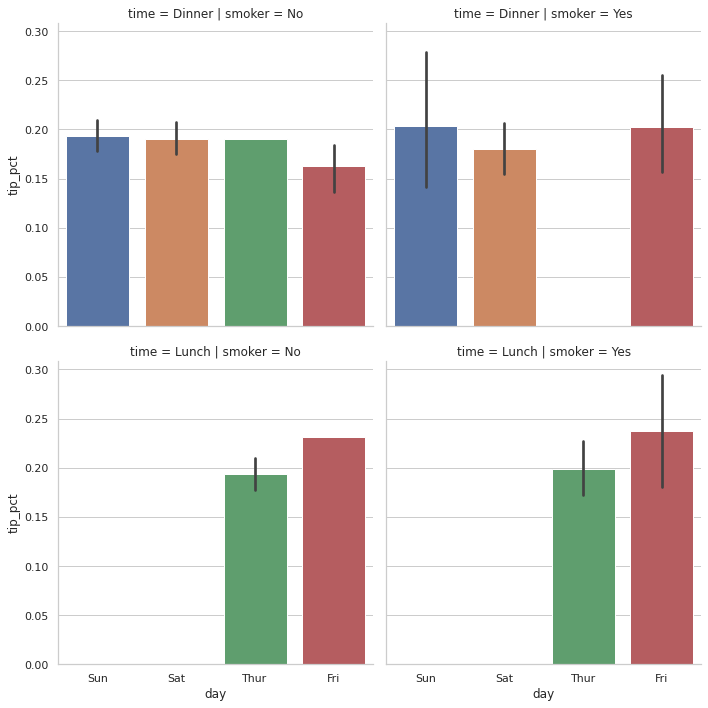

In [25]:
sns.catplot(x='day', y='tip_pct', row='time',
            col='smoker', kind='bar', data=tips[tips['tip_pct'] < 1])

> `catplot` supports other plot types that may be useful. For example, box plots (which show the median, quartiles, and out‐
liers) can be an effective visualization type

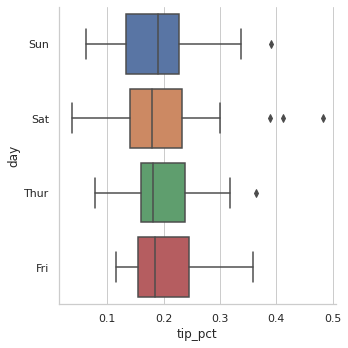

In [26]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips['tip_pct'] < 0.5])